## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import seaborn as sns

## Importing data

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Pre-processing Data

In [3]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data = pd.get_dummies(data,columns=['sex','smoker','region'])
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = data.drop('charges',axis=1)
y = data['charges']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [7]:
xtrain.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
48,60,24.53,0,1,0,1,0,0,0,1,0
821,26,17.67,0,0,1,1,0,0,1,0,0
856,48,33.11,0,1,0,0,1,0,0,1,0
1260,32,20.52,0,1,0,1,0,1,0,0,0
527,51,25.80,1,1,0,1,0,0,0,0,1


In [8]:
xtest.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1242,22,21.28,3,1,0,1,0,0,1,0,0
898,18,40.26,0,1,0,1,0,0,0,1,0
332,61,31.16,0,1,0,1,0,0,1,0,0
976,48,40.15,0,0,1,1,0,0,0,1,0
455,59,37.40,0,0,1,1,0,0,0,0,1


In [9]:
ytrain.head()

48      12629.8967
821      2680.9493
856     40974.1649
1260     4544.2348
527      9861.0250
Name: charges, dtype: float64

In [10]:
ytest.head()

1242     4296.2712
898      1634.5734
332     13429.0354
976      7804.1605
455     21797.0004
Name: charges, dtype: float64

In [11]:
xtrain.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.267290,30.645916,1.110280,0.489720,0.510280,0.792523,0.207477,0.237383,0.245794,0.272897,0.243925
std,13.923402,6.142122,1.204523,0.500128,0.500128,0.405689,0.405689,0.425678,0.430759,0.445657,0.429649
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.205000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.380000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing Data

<Figure size 432x288 with 0 Axes>

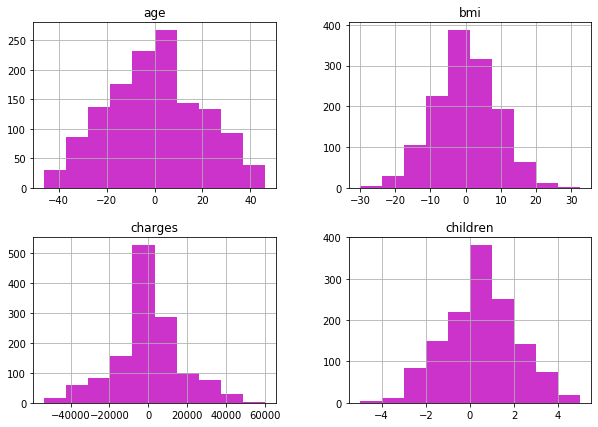

In [12]:
plt.figure()
data[['age','bmi','children','charges']].diff().hist(color='m',alpha=0.8, figsize=(10,7));

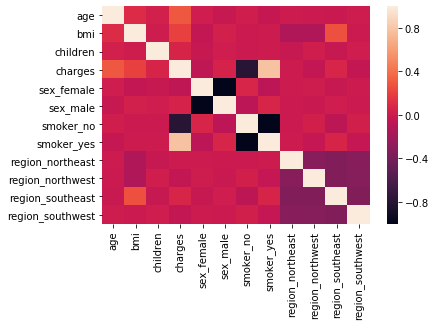

In [13]:
sns.heatmap(data.corr())

## Training, Testing and Predicting model

In [14]:
clf = lr.LinearRegression().fit(xtrain,ytrain)

In [15]:
y_pred = clf.predict(xtest)

In [16]:
clf.score(xtest,ytest)

0.7581746742646341

## Visualising Result

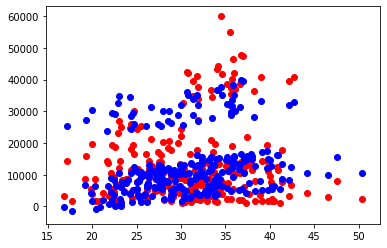

In [17]:
plt.scatter(xtest['bmi'],ytest,c='red')
plt.scatter(xtest['bmi'],y_pred,c='blue')